In [2]:
from matplotlib import pyplot as plt
import numpy as np
import json
import os
from scipy.signal import savgol_filter

# 11x11棋盘的训练数据处理

### loss, entropy

([<matplotlib.lines.Line2D at 0x1d60bed1040>],
 [<matplotlib.lines.Line2D at 0x1d60bed13a0>])

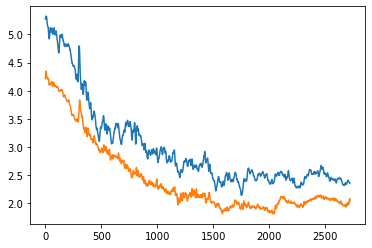

In [3]:
with open("../resources/11x11/all_data.json") as file:
    all_data = json.load(file)[1: ]
    # print(all_data[0]["loss"])
    loss = np.array([data["loss"] for data in all_data])
    entropy = np.array([data["entropy"] for data in all_data])
    time_cost = np.array([data["time_cost"] for data in all_data])
    winner = np.array([data["winner"] for data in all_data])
    episode_len = np.array([data["episode_len"] for data in all_data])

fig = plt.figure()
ax = fig.add_subplot(111)
loss_smooth = savgol_filter(loss,53,10)
entropy_smooth = savgol_filter(entropy,53,10)
ax.plot(loss_smooth), ax.plot(entropy_smooth)

### 总胜率

([<matplotlib.lines.Line2D at 0x1d60cfa6be0>],
 [<matplotlib.lines.Line2D at 0x1d60cfa6f40>])

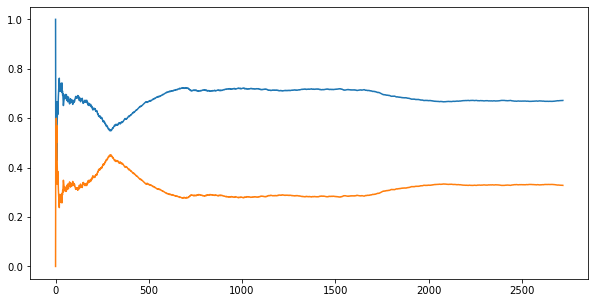

In [4]:
black_win_rate = np.array([np.count_nonzero(winner[:i+1]==1) / (i+1 )for i in range(len(winner))])
white_win_rate = 1 - black_win_rate
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.plot(black_win_rate), ax.plot(white_win_rate)

In [5]:
len(winner)

2721

### 实时胜率

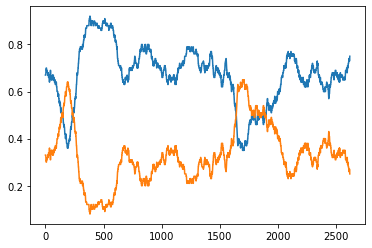

In [23]:
interval = 100
black_win_rate_timely = np.array([np.count_nonzero(winner[i-interval: i] == 1) / interval for i in range(interval, len(winner))])
white_win_rate_timely = np.array([np.count_nonzero(winner[i-interval: i] == 2) / interval for i in range(interval, len(winner))])
plt.plot(black_win_rate_timely)
plt.plot(white_win_rate_timely)

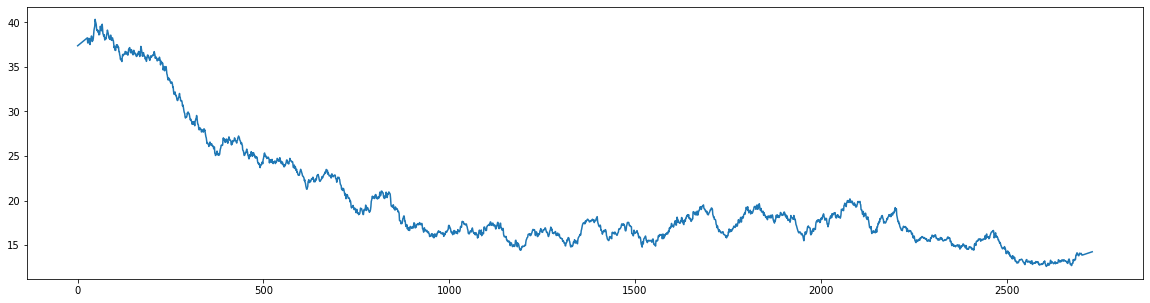

In [6]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
len_smooth = savgol_filter(episode_len,53,1)
ax.plot(len_smooth)

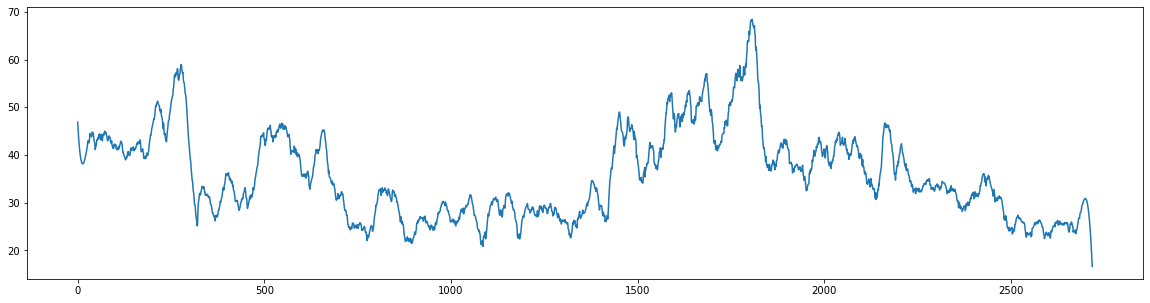

In [7]:
time_cost = time_cost[np.where(time_cost < 500)]
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
smooth_cost = savgol_filter(time_cost,53,3)
ax.plot(smooth_cost)